# Fashion MNIST Classification Assignment

<h1>Convolutional Neural Network with Batch-Normalization </h1> 


<!--Empty Space for separating topics-->


<h2>Preparation</h2>


In [1]:

# Import the libraries we need to use in this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision
!pip install torchinfo
!pip install torchvision==0.9.1 torch==1.8.1 
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from torchinfo import summary
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))
    

In [2]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

<h2 id="Makeup_Data">Get the Data</h2> 


we create a transform to resize the image and convert it to a tensor :


In [3]:

IMAGE_SIZE = 32

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])
composed 

Compose(
    Resize(size=(32, 32), interpolation=bilinear)
    ToTensor()
)

Load the training dataset by setting the parameters <code>train </code> to <code>True</code>. We use the transform defined above.


In [4]:

train_dataset = dsets.FashionMNIST(root='./data', train=True, download=True, transform=composed)

In [5]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear)
               ToTensor()
           )

Load the testing dataset by setting the parameters train  <code>False</code>.


In [6]:
# Make the validating 

validation_dataset = dsets.FashionMNIST(root='./data', train=False, download=True, transform=composed)
validation_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear)
               ToTensor()
           )

We can see the data type is long.


In [7]:
# Show the data type for each element in dataset

type(train_dataset[0][1])

int

Plot the fourth image and label


Ankle Boot


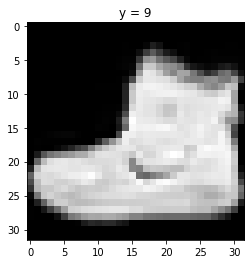

In [8]:
# The image for the fourth data element
print(output_label(train_dataset[0][1]))
show_data(train_dataset[0])


## Q : three images of the validation dataset 

Ankle Boot


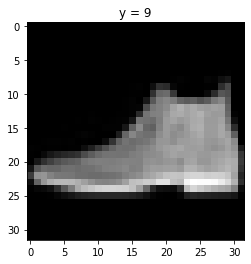

In [9]:
# The image for the fourth data element
print(output_label(validation_dataset[0][1]))
show_data(validation_dataset[0])

Pullover


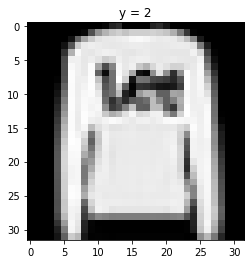

In [10]:
print(output_label(validation_dataset[1][1]))
show_data(validation_dataset[1])

Trouser


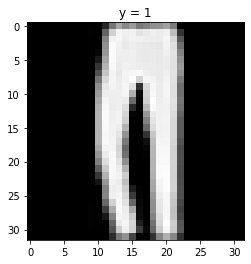

In [11]:
print(output_label(validation_dataset[2][1]))
show_data(validation_dataset[2])

<!--Empty Space for separating topics-->


<h2 id="CNN">Build Convolutional Neural Network Class</h2>


Build a Convolutional Network class with two Convolutional layers and one fully connected layer. But we add Batch Norm for the convolutional layers. 


In [12]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 8 * 8, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Function to train the model 


In [13]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    
    #global variable 
    N_test=len(validation_dataset)
    accuracy_list=[]
    cost_list=[]
    COST=0
    for epoch in range(n_epochs):
        for x, y in train_loader:
            COST=0
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST += loss.data
            
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
    return accuracy_list, cost_list

<h2 id="Train">Define the Convolutional Neural Network Classifier, Criterion function, Optimizer and Train the Model</h2> 


There are 16 output channels for the first layer, and 32 output channels for the second layer 


Train the model and determine validation accuracy technically test accuracy Process by the model with  batchnorm 


In [33]:
model_batch=CNN_batch(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)


accuracy_list, cost_list=train_model(model=model_batch,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

In [35]:
print(model_batch)

CNN_batch(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=10, bias=True)
  (bn_fc1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


<!--Empty Space for separating topics-->


<h2 id="Result">Analyze Results</h2> 


Plot the loss and accuracy on the validation data:

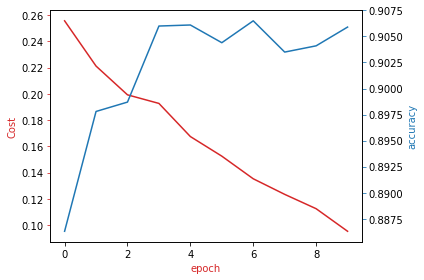

In [34]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot( accuracy_list, color=color)
ax2.set_xlabel('epoch', color=color)
ax2.set_ylabel('accuracy', color=color) 
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

## Change optimizer  SGD to ADAM

In [14]:
model_batch=CNN_batch(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.Adam(model_batch.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)


accuracy_list, cost_list=train_model(model=model_batch,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

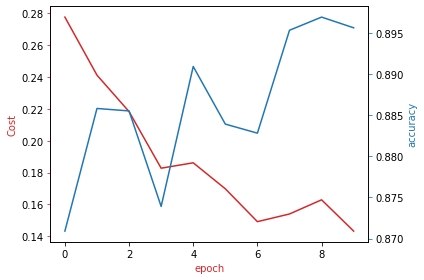

In [15]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot( accuracy_list, color=color)
ax2.set_xlabel('epoch', color=color)
ax2.set_ylabel('accuracy', color=color) 
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Plot the first five mis-classified samples:

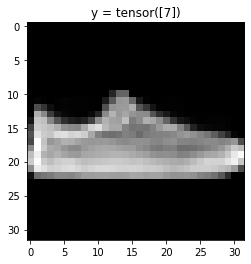

Actual label :  Sneaker
Prediction :  Sandal


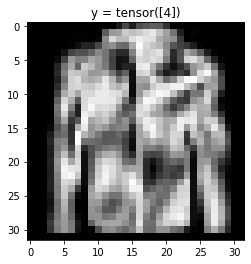

Actual label :  Coat
Prediction :  Shirt


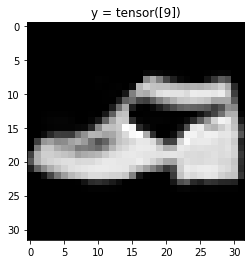

Actual label :  Ankle Boot
Prediction :  Sandal


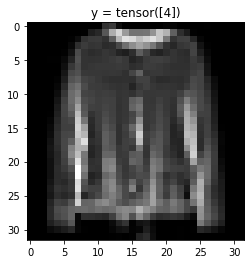

Actual label :  Coat
Prediction :  Pullover


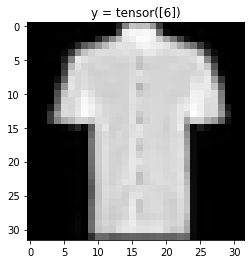

Actual label :  Shirt
Prediction :  T-shirt/Top


In [41]:
# Plot the mis-classified samples

count = 0
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    z = model_batch(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("Actual label : ", output_label(y))
        print("Prediction : ", output_label(yhat))
        count += 1
    if count >= 5:
        break  